In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn import tree

In [3]:
df = pd.read_csv('PastHires.csv')

In [4]:
df

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N
5,0,N,0,PhD,Y,Y,Y
6,5,Y,2,MS,N,Y,Y
7,3,N,1,BS,N,Y,Y
8,15,Y,5,BS,N,N,Y
9,0,N,0,BS,N,N,N


In [5]:
def enumerar(coluna):
    return {k:v for v,k in enumerate(coluna.unique())}

for c in ['Employed?', 'Level of Education', 'Top-tier school', 'Interned', 'Hired']:
    df[c] = df[c].map(enumerar(df[c]))
    
df

{'Y': 0, 'N': 1}
{'BS': 0, 'MS': 1, 'PhD': 2}
{'N': 0, 'Y': 1}
{'N': 0, 'Y': 1}
{'Y': 0, 'N': 1}


,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,0,4,0,0,0,0
1,0,1,0,0,1,1,0
2,7,1,6,0,0,0,1
3,2,0,1,1,1,0,0
4,20,1,2,2,1,0,1
5,0,1,0,2,1,1,0
6,5,0,2,1,0,1,0
7,3,1,1,0,0,1,0
8,15,0,5,0,0,0,0
9,0,1,0,0,0,0,1


In [13]:
features, target = df.columns.tolist(), ['Hired']
features.remove('Hired')
features, target

(['Years Experience',
  'Employed?',
  'Previous employers',
  'Level of Education',
  'Top-tier school',
  'Interned'],
 ['Hired'])

In [18]:
dir(tree)

['DecisionTreeClassifier',
 'DecisionTreeRegressor',
 'ExtraTreeClassifier',
 'ExtraTreeRegressor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_criterion',
 '_splitter',
 '_tree',
 '_utils',
 'export',
 'export_graphviz',
 'tree']

In [20]:
clf = tree.DecisionTreeClassifier()

x,y = df[features], df[target]
clf.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [22]:
inp = [[20,1,2,2,1,0]]
clf.predict(inp)

array([1])

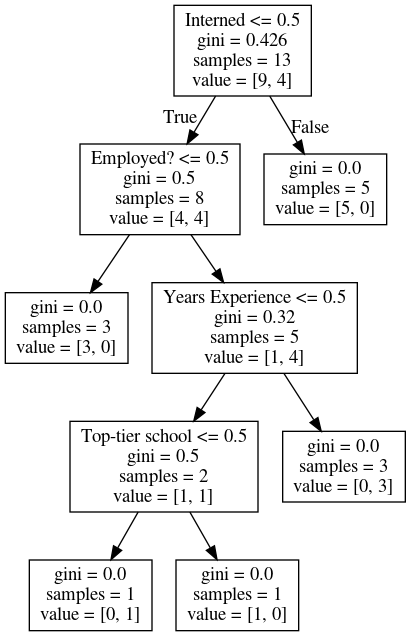

In [27]:
from IPython.display import Image
from sklearn.externals.six import StringIO
import pydotplus

dot_data = StringIO()

tree.export_graphviz(
    clf,
    out_file=dot_data,
    feature_names = features
)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())